In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
import os
import shapely
from fiona.crs import from_epsg
import shapefile as shp
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point

1.Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. Load it as a geopandas file

In [2]:
shape_path= os.getenv("PUIDATA")+"/nycb2010.shp"
nyc_shape = GeoDataFrame.from_file(shape_path)

In [3]:
nyc_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


The 'geometry' (shapely polygon coordinates) are in epsg = 2263 : US feet. You want to convert them in epsg = 4326: lat/on . 

In [4]:
NYC_shape = nyc_shape.to_crs(epsg=4326)
NYC_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((-74.07920577013249 40.643430783779, ..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((-74.07061992438021 40.6108550670875,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910647 40.62600632456046...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((-74.0870879968983 40.61116883127258,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511995 40.60100160658921...


2.Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon

In [5]:
#http://chrisalbon.com/python/pandas_selecting_rows_on_conditions.html
NYC_Bro = NYC_shape[(NYC_shape['BoroName'] == "Brooklyn")]
NYC_Bro.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273368512...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384570529...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,"POLYGON ((-73.99270830309769 40.6980992598468,..."
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.9851430608965 40.69488514300313,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793357372...


3.Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

In [6]:
#also the coordinates of One Metrotech Center
CUSP = shapely.geometry.Point(-73.987069,40.692816)

4.Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

In [7]:
for i in NYC_Bro.index:
    if NYC_Bro.geometry[i].contains(CUSP):
        print 'CUSP is contained in geometery index', i

CUSP is contained in geometery index 7591


In [8]:
NYC_shape.ix[7591]

BCTCB2010                                           30011001008
BoroCode                                                      3
BoroName                                               Brooklyn
CB2010                                                     1008
CT2010                                                   001100
Shape_Area                                              92776.3
Shape_Leng                                              1221.03
geometry      POLYGON ((-73.98622595691906 40.6930883134384,...
Name: 7591, dtype: object

5.Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot) and overplot the location of cusp as a point (using pylab.scatter) Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

/Users/YueCai/anaconda/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)
/Users/YueCai/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


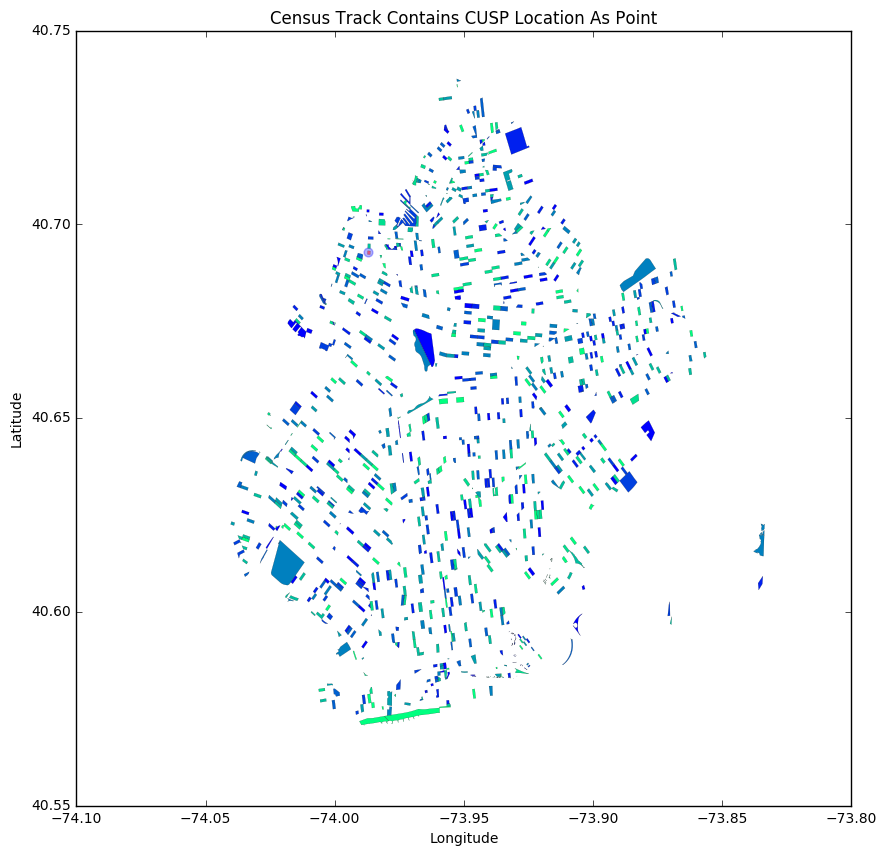

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(True)
ax.get_yaxis().set_visible(True)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

NYC_Bro.iloc[::10].plot(colormap='winter',alpha=1,linewidth=0.1,ax=ax) #every 10
plt.scatter(-73.987069,40.692816, color='b', alpha=0.3, s=40) # cooridnates of CUSP as point 
NYC_Bro.loc[NYC_Bro['BCTCB2010'] == '30011001008'].plot(color='r',linewidth=0.1,ax=ax)# census track

plt.title("Census Track Contains CUSP Location As Point")
plt.legend(loc='upper right')